Nama : Tiara Lailatul Nikmah  
Username : Tiara Laila  
Email : tiaralaila21@gmail.com  
Asal kota : Juwana, Pati

## **Mengimport library python yang dibutuhkan**

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## **Mempersiapkan Dataset**

In [2]:
# load the dataset
car = pd.read_csv('Cars24.csv')
car

,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642
...,...,...,...,...,...,...,...,...,...,...,...
5913,5913,Toyota,Fortuner3.0 AT 4X2,1234899,2012,Chennai,Diesel,197177,Automatic,1,27470
5914,5914,Toyota,Innova2.5 VX 8 STR BS IV,892699,2012,Chennai,Diesel,115553,Manual,2,19858
5915,5915,Maruti,Wagon R 1.0VXI,381399,2014,Chennai,Petrol,24663,Manual,1,8484
5916,5916,Hyundai,i10SPORTZ 1.2 KAPPA2 O,310899,2011,Chennai,Petrol,30159,Manual,1,6916


## **Menghapus kolom yang tidak dipakai**

In [3]:
# hapus kolom unnamed karena tidak dipakai
car.drop(['Unnamed: 0'], axis=1, inplace=True)

## **Melihat info pada dataset**

In [4]:
# melihat data 5 teratas
car.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


In [5]:
# melihat info dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5918 entries, 0 to 5917
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Brand      5918 non-null   object
 1   Model          5653 non-null   object
 2   Price          5918 non-null   int64 
 3   Model Year     5918 non-null   int64 
 4   Location       5918 non-null   object
 5   Fuel           5918 non-null   object
 6   Driven (Kms)   5918 non-null   int64 
 7   Gear           5653 non-null   object
 8   Ownership      5918 non-null   int64 
 9   EMI (monthly)  5918 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 462.5+ KB


In [6]:
# melihat deskripsi dataset
car.describe()

,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
count,5.918000e+03,5918.000000,5918.000000,5918.000000,5918.000000
mean,5.180530e+05,2014.547651,60842.778979,1.285738,11523.801284
std,3.224695e+05,2.905185,42362.990292,0.532820,7173.156118
min,9.100000e+04,2007.000000,179.000000,1.000000,2024.000000
25%,3.205240e+05,2012.000000,30856.000000,1.000000,7129.750000
50%,4.303990e+05,2015.000000,53514.000000,1.000000,9574.000000
75%,6.157990e+05,2017.000000,81979.250000,1.000000,13698.000000
max,6.500000e+06,2021.000000,912380.000000,4.000000,144589.000000


## **Mengganti nama kolom agar lebih mudah dipakai**

In [7]:
# ganti nama kolom
car = car.rename(columns={"Car Brand": "Car_Brand", "Model Year": "Model_Year", "Driven (Kms)": "Driven", "EMI (monthly)": "EMI"})

In [8]:
# melihat nama kolom yang telah diubah
car.head()

,Car_Brand,Model,Price,Model_Year,Location,Fuel,Driven,Gear,Ownership,EMI
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


## **Missing Value**

In [9]:
# cek ada berapa missing value pada kolom
Price = (car.Price == 0).sum()
Model_Year = (car.Model_Year == 0).sum()
Driven = (car.Driven == 0).sum()
Ownership = (car.Ownership == 0).sum()
EMI = (car.EMI == 0).sum()

print("Nilai 0 di kolom Price ada: ", Price)
print("Nilai 0 di kolom  Model_Year ada: ", Model_Year)
print("Nilai 0 di kolom Driven ada: ", Driven)
print("Nilai 0 di kolom Ownership ada: ", Ownership)
print("Nilai 0 di kolom EMI ada: ", EMI)

Nilai 0 di kolom Price ada:  0
Nilai 0 di kolom  Model_Year ada:  0
Nilai 0 di kolom Driven ada:  0
Nilai 0 di kolom Ownership ada:  0
Nilai 0 di kolom EMI ada:  0


# **Visualisasikan data Diamonds dengan boxplot untuk mendeteksi outliers**

**Boxplot fitur Year**

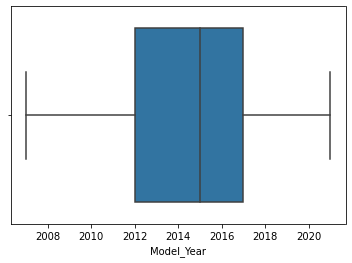

In [10]:
# 1. Year
sns.boxplot(x=car['Model_Year'])

**Boxpolt fitur Price**

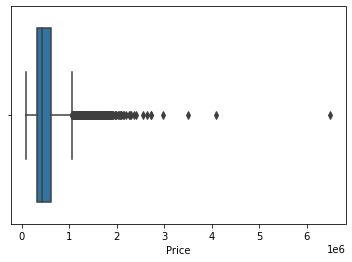

In [11]:
# 2. Price
sns.boxplot(x=car['Price'])

**Boxpolt fitur Driven**

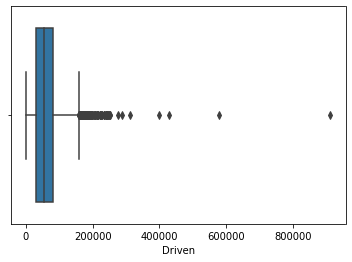

In [12]:
# 3. Driven
sns.boxplot(x=car['Driven'])

**Boxpolt fitur Ownership**

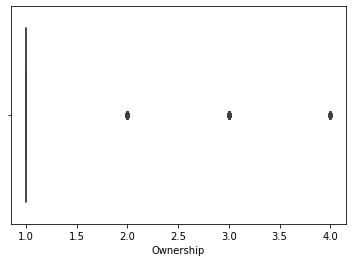

In [13]:
# 4. OwnerShip
sns.boxplot(x=car['Ownership'])

**Boxpolt fitur EMI**

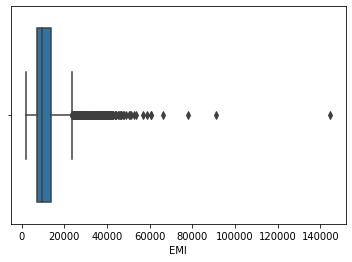

In [14]:
# 4. EMI
sns.boxplot(x=car['EMI'])

## **Mengatasi Outliner**

In [15]:
# membuat batas bawah dan batas atas
Q1 = car.quantile(0.25)
Q3 = car.quantile(0.75)
IQR=Q3-Q1
car=car[~((car<(Q1-1.5*IQR))|(car>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
car.shape

(4085, 10)

# **Proses analisis data dengan teknik Univariate EDA**

## **Membagi fitur dataset**

In [16]:
# bagi fitur pada dataset menjadi dua bagian
numerical_features = ['Model_Year', 'Price', 'Driven', 'Ownership', 'EMI']
categorical_features = ['Car_Brand', 'Model', 'Location', 'Fuel', 'Gear']

## **Categorical Features**
**Analisis terhadap fitur kategori**

**Analisis fitur Car_Brand**

            jumlah sampel  persentase
Maruti               2203        53.9
Hyundai               848        20.8
Honda                 301         7.4
Renault               129         3.2
Toyota                129         3.2
Volkswagen            123         3.0
Ford                  104         2.5
Mahindra               80         2.0
Tata                   59         1.4
Skoda                  27         0.7
Nissan                 21         0.5
Datsun                 21         0.5
Chevrolet              21         0.5
Fiat                   11         0.3
Mercedes                3         0.1
BMW                     3         0.1
Ssangyong               2         0.0


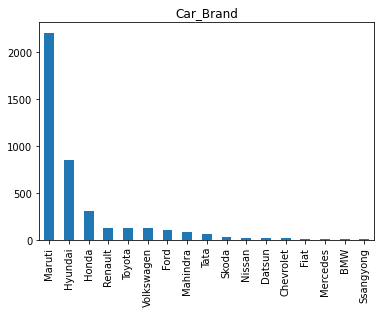

In [17]:
# Fitur Car_Brand
feature = categorical_features[0]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Analisis fitur Model**

                                 jumlah sampel  persentase
Alto 800LXI                                143         3.7
Wagon R 1.0VXI                             131         3.3
SwiftVXI                                   107         2.7
Alto K10VXI                                105         2.7
SwiftVDI                                    97         2.5
...                                        ...         ...
RextonRX7                                    1         0.0
Vitara BrezzaZDI+ DUAL TONE AMT              1         0.0
DusterRXZ AMT 110 PS                         1         0.0
Rapid1.5 TDI AT ELEGANCE                     1         0.0
XUV 3OOW4 PETROL                             1         0.0

[687 rows x 2 columns]


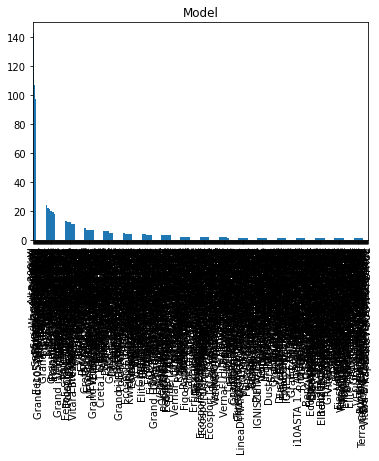

In [18]:
# Fitur Model
feature = categorical_features[1]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Analisis fitur Location**

           jumlah sampel  persentase
Delhi               1667        40.8
Mumbai              1195        29.3
Bangalore            551        13.5
Chennai              420        10.3
Hyderabad            252         6.2


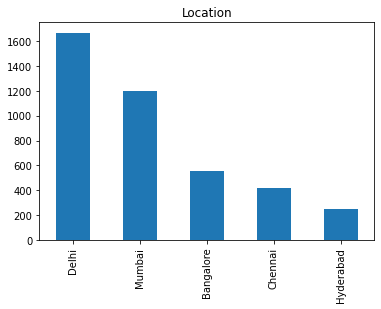

In [19]:
# Fitur Location
feature = categorical_features[2]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Analisis fitur Fuel**

              jumlah sampel  persentase
Petrol                 2698        66.0
Diesel                 1273        31.2
Petrol + CNG            105         2.6
Petrol + LPG              8         0.2
Electric                  1         0.0


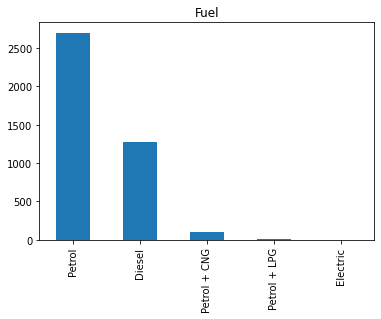

In [20]:
# Fitur Fuel
feature = categorical_features[3]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Analisis fitur Gear**

           jumlah sampel  persentase
Manual              3624        92.5
Automatic            292         7.5


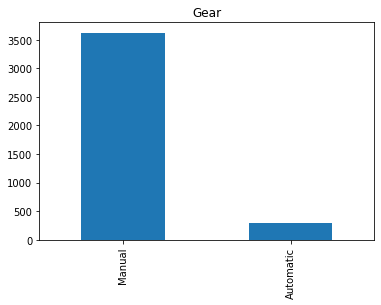

In [21]:
# Fitur Gear
feature = categorical_features[4]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

## **Numerical Features**

**Histogram Fitur Numerik**

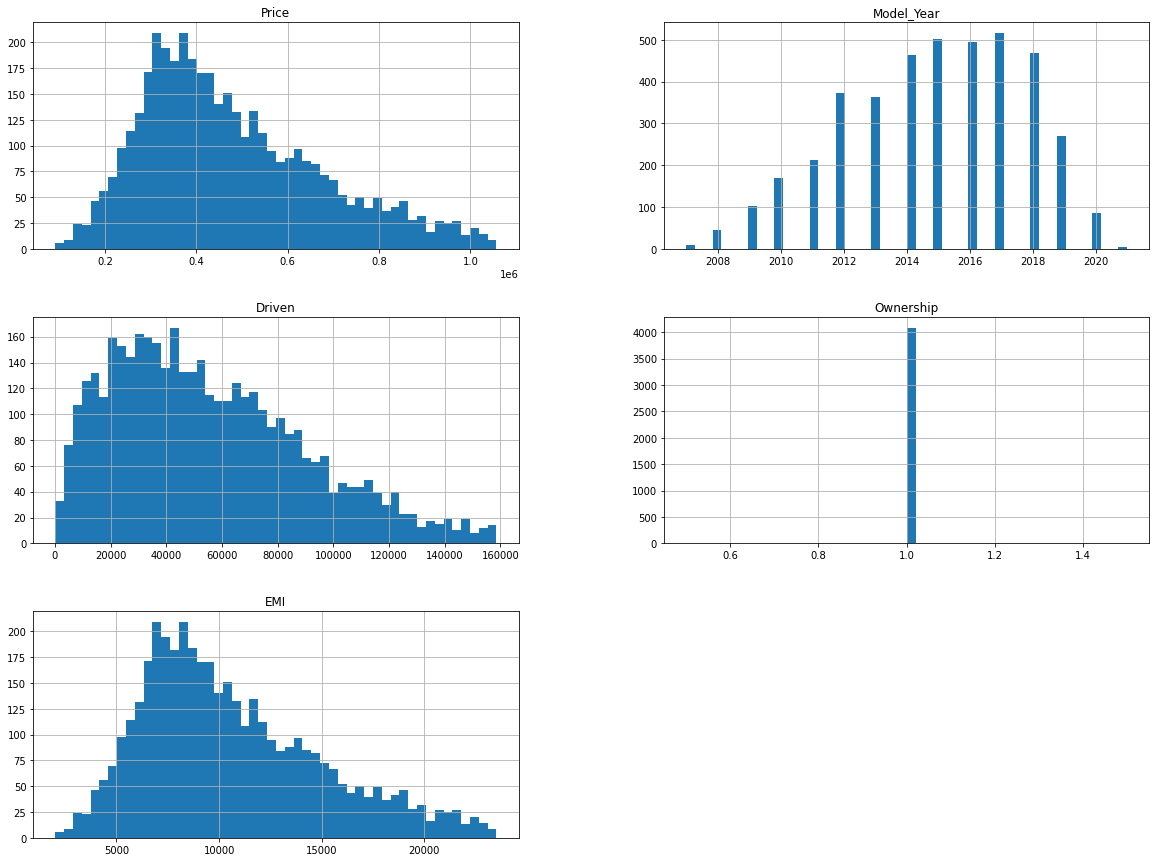

In [22]:
# histogram masing-masing fitur numerik
car.hist(bins=50, figsize=(20,15))
plt.show()

# **Exploratory Data Analysis - Multivariate Analysis**

## **Categorical Features**
**Analisis data pada fitur kategori**

**Analisis Hubungan Fitur Kategori dengan Harga**

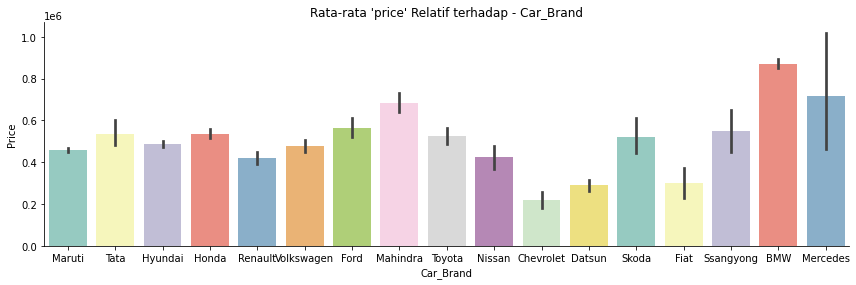

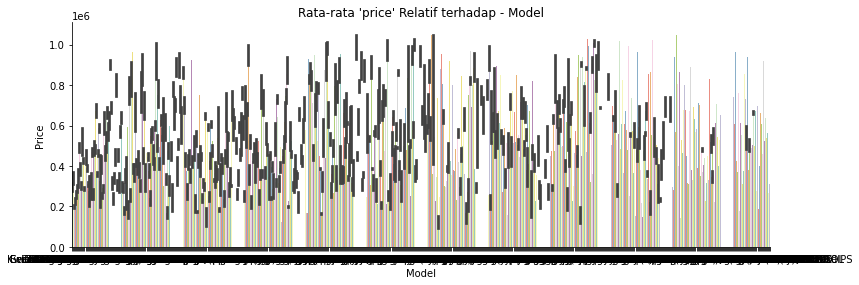

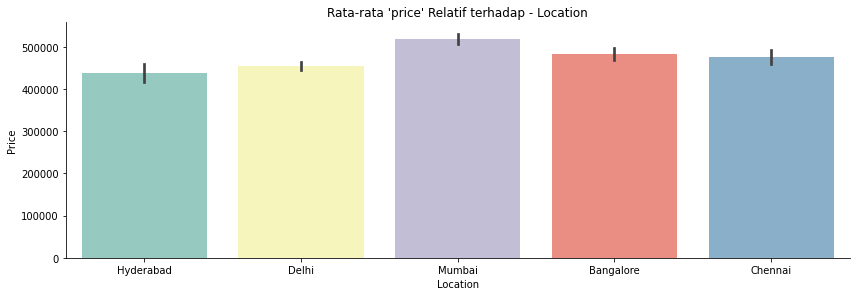

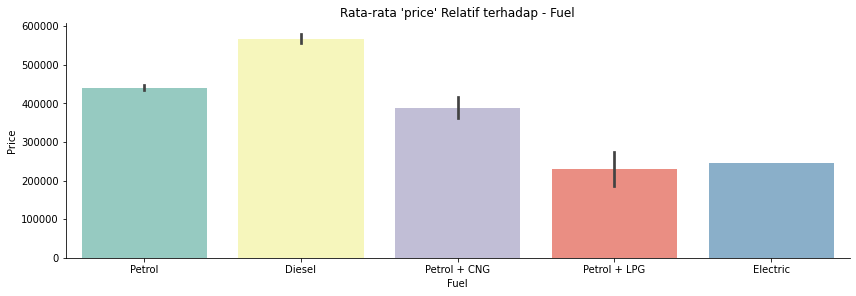

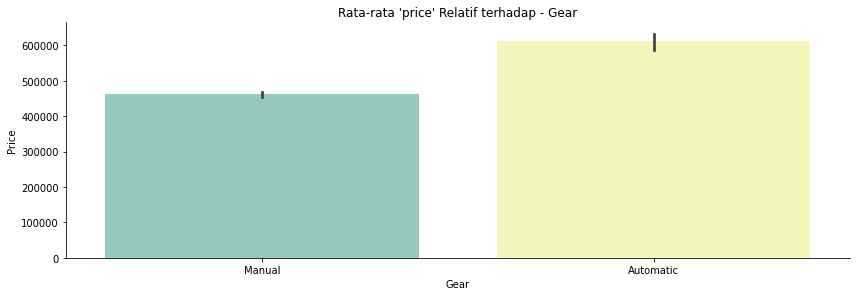

In [23]:
# mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga
cat_features = car.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=car, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

## **Numerical Features**

**Analisis Hubungan Fitur Numerik dengan Harga**

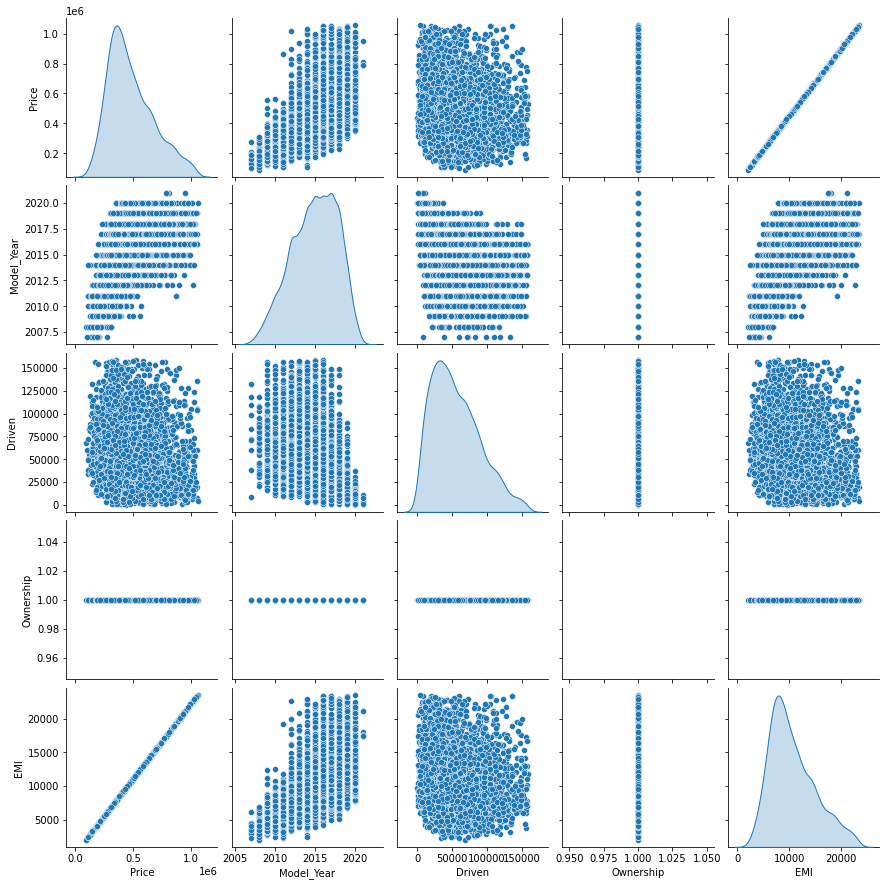

In [24]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(car, diag_kind = 'kde')

## **Mengevaluasi skor korelasi**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

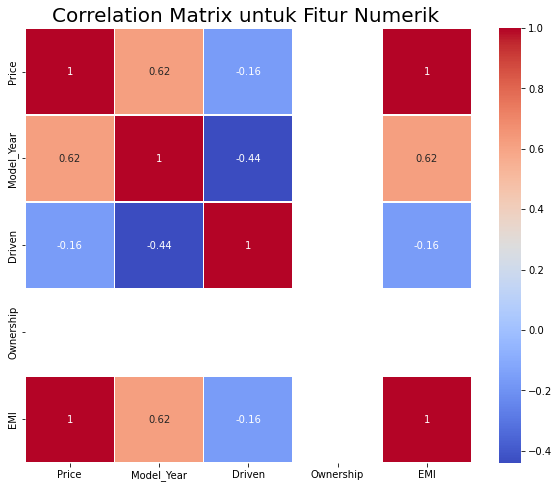

In [25]:
# mengevaluasi skor korelasinya, gunakan fungsi corr()

plt.figure(figsize=(10, 8))
correlation_matrix = car.corr().round(2)

# annot = True untuk mencetak nilai di dalam kotak
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## **Hapus Kolom yang tidak berpengaruh**

In [26]:
# hapus kolom ownership karena tidak berpengaruh dengan harga
car.drop(['Ownership'], axis=1, inplace=True)

In [27]:
# mengecek dataset setelah menghapus kolom ownership
car.head()

,Car_Brand,Model,Price,Model_Year,Location,Fuel,Driven,Gear,EMI
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,7790
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,4642
5,Maruti,AltoLXI,249699,2012,Hyderabad,Petrol,28434,Manual,5554
6,Maruti,AltoLXI,240599,2011,Hyderabad,Petrol,31119,Manual,5352


# **Data Preparation**

## **Encoding Fitur Kategori**

In [28]:
# lakukan proses encoding ini dengan fitur get_dummies 'car_brand', 'model', 'location', 'fuel', 'gear'
# untuk mengganti nilai data kategorik menjadi data numerik
from sklearn.preprocessing import  OneHotEncoder
car = pd.concat([car, pd.get_dummies(car['Car_Brand'], prefix='Car_Brand', drop_first=True)],axis=1)
car = pd.concat([car, pd.get_dummies(car['Model'], prefix='Model', drop_first=True)],axis=1)
car = pd.concat([car, pd.get_dummies(car['Location'], prefix='Location', drop_first=True)],axis=1)
car = pd.concat([car, pd.get_dummies(car['Fuel'], prefix='Fuel', drop_first=True)],axis=1)
car = pd.concat([car, pd.get_dummies(car['Gear'], prefix='Gear', drop_first=True)],axis=1)
car.drop(['Car_Brand', 'Model', 'Location', 'Fuel', 'Gear'], axis=1, inplace=True)
car.head(100)

,Price,Model_Year,Driven,EMI,Car_Brand_Chevrolet,Car_Brand_Datsun,Car_Brand_Fiat,Car_Brand_Ford,Car_Brand_Honda,Car_Brand_Hyundai,Car_Brand_Mahindra,Car_Brand_Maruti,Car_Brand_Mercedes,Car_Brand_Nissan,Car_Brand_Renault,Car_Brand_Skoda,Car_Brand_Ssangyong,Car_Brand_Tata,Car_Brand_Toyota,Car_Brand_Volkswagen,Model_A StarLXI,Model_A StarVXI,Model_A StarVXI ABS AT,Model_AURAS MT CNG,Model_AURASX O MT 1.2 Diesel,Model_AccentEXECUTIVE GLE,Model_AccentGLE,Model_Accord2.4 MT,Model_Alto 800LXI,Model_Alto 800LXI CNG,Model_Alto 800LXI OPT,Model_Alto 800VXI,Model_Alto K10LXI,Model_Alto K10VXI,Model_Alto K10VXI (O) AMT,Model_Alto K10VXI AMT,Model_Alto K10VXI OPT,Model_AltoLX,Model_AltoLXI,Model_AltoLXI CNG,...,Model_ZestXMS QUADRAJET 90PS,Model_i10ASTA 1.2 AT KAPPA2 WITH SUNROOF,Model_i10ASTA 1.2 KAPPA2,Model_i10ERA,Model_i10ERA 1.1 IRDE,Model_i10MAGNA,Model_i10MAGNA 1.1 IRDE2,Model_i10MAGNA 1.2,Model_i10MAGNA 1.2 AT,Model_i10MAGNA 1.2 KAPPA2,Model_i10SPORTZ 1.1 IRDE2,Model_i10SPORTZ 1.2,Model_i10SPORTZ 1.2 AT,Model_i10SPORTZ 1.2 AT KAPPA2,Model_i10SPORTZ 1.2 KAPPA2,Model_i10SPORTZ 1.2 KAPPA2 O,Model_i20 Active1.2 S,Model_i20 Active1.2 SX,Model_i20 Active1.4 SX,Model_i20ASTA 1.2,Model_i20ASTA 1.2 O WITH SUNROOF,Model_i20ASTA 1.4 CRDI,Model_i20ERA 1.4 CRDI,Model_i20MAGNA 1.2 VTVT,Model_i20MAGNA 1.4 CRDI,Model_i20MAGNA O 1.2,Model_i20MAGNA O 1.4 CRDI,Model_i20SPORTZ 1.2 O,Model_i20SPORTZ 1.2 VTVT,Model_i20SPORTZ 1.4 CRDI,Model_i20SPORTZ O 1.4 CRDI,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Mumbai,Fuel_Electric,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Gear_Manual
1,350199,2011,20979,7790,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,306399,2011,19662,6816,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,208699,2015,11256,4642,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,249699,2012,28434,5554,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
6,240599,2011,31119,5352,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,523799,2014,46849,11652,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
156,295499,2013,68484,6573,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
157,405399,2015,59222,9018,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
159,348399,2019,30782,7750,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


## **Train-Test-Split**

**Membagi Dataset**

In [29]:
# menggunakan proporsi pembagian sebesar 90:10 dengan fungsi train_test_split dari sklearn
from sklearn.model_selection import train_test_split
 
X = car.drop(["Price"],axis =1)
y = car["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

**Cek Jumlah Sampel**

In [30]:
# mengecek jumlah sampel pada masing-masing bagian
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4085
Total # of sample in train dataset: 3676
Total # of sample in test dataset: 409


## **Standarisasi**

**Fitur standarisasi pada data latih**

In [31]:
# import library
from sklearn.preprocessing import StandardScaler

# standarisasi
numerical_features = ['Model_Year', 'Driven', 'EMI']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Model_Year,Driven,EMI
5381,-1.359962,0.096482,-1.013887
1437,-1.008029,0.799182,-1.002568
1550,-0.304161,1.048087,-0.320936
4045,0.399707,0.781558,0.510561
2121,-1.359962,-0.123051,-1.463480


**Nilai Mean dan Standar Deviasi**

In [32]:
# mengecek nilai mean dan standar deviasi pada setelah proses standarisasi
X_train[numerical_features].describe().round(4)

,Model_Year,Driven,EMI
count,3676.0000,3676.0000,3676.0000
mean,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001
min,-2.7677,-1.5984,-1.9540
25%,-0.6561,-0.7901,-0.7497
50%,0.0478,-0.1701,-0.2197
75%,0.7516,0.6346,0.6298
max,2.1594,2.9864,2.9116


# **Model Development**

In [33]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

## **K-Nearest Neighbor**

In [34]:
# Import library
from sklearn.neighbors import KNeighborsRegressor

# buat model prediksi
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

## **Random Forest**

In [35]:
# Import library yang dibutuhkan
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=8, max_depth=30, random_state=52, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)
models.loc['train_rmse','RandomForest'] = np.sqrt(mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train))

## **Boosting Algorithm**

In [36]:
# import library
from sklearn.ensemble import AdaBoostRegressor

# buat model prediksi
boosting = AdaBoostRegressor(n_estimators=5, learning_rate=0.05, random_state=90)                             
boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)
models.loc['train_rmse','Boosting'] = np.sqrt(mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train))

# **Evaluasi Model**

**Proses Scaling**

In [37]:
# Skala fitur numerik kami sehingga memiliki rata-rata nol dan varians satu
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


**Metrik MSE (Mean Squared Error)**

In [38]:
# evaluasi ketiga model kita dengan metrik MSE
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,1.1639e+06,1.74399e+06
RF,79.2499,117.142
Boosting,803786,772898


**Metrik RMSE (Root Mean Squared Error)**

In [39]:
# evaluasi ketiga model kita dengan metrik RMSE
rmse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    rmse.loc[name, 'train'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)))/1e3 
    rmse.loc[name, 'test'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)))/1e3
 
rmse

,train,test
KNN,34.1159,41.7611
RF,0.281514,0.342261
Boosting,28.3511,27.801


**Plot Metrik MSE**

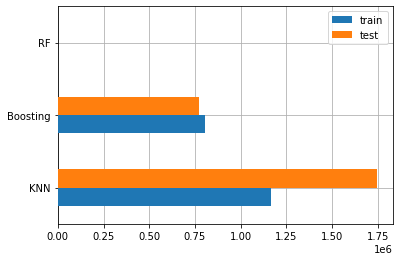

In [40]:
# plot metrik tersebut dengan bar chart
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Plot Metrik RSME**

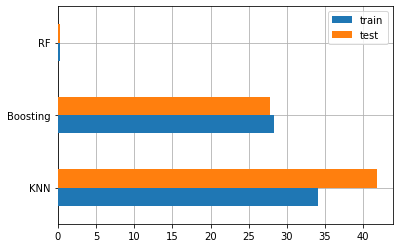

In [41]:
# plot metrik tersebut dengan bar chart
fig, ax = plt.subplots()
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Menguji Model Terbaik**




In [42]:
 # pilih sebagai model terbaik untuk melakukan prediksi harga diamonds
 # menguji
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
2090,304099,295723.5,304049.0,313039.8
